<a href="https://colab.research.google.com/github/NOTGOD6000/Exploratory-Data-Analysis-on-Heart-Disease-Dataset/blob/main/Exploratory%20Data%20Analysis%20on%20Heart%20Disease%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **EXPLORATORY DATA ANALYSIS IN PYTHON**



**What is Exploratory Data Analysis ?**

 Exploratory Data Analysis (EDA) is the process of examining and summarizing a dataset to understand its characteristics, identify patterns, and make informed decisions. It involves calculating summary statistics, visualizing data through plots and charts, identifying missing or inconsistent data, and exploring relationships between variables. EDA provides insights that guide further analysis and decision-making.

 EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

**How to perform Exploratory Data Analysis ?**

Performing EDA involves the following concise steps:

1. **Understand the Data:** Get familiar with the dataset's structure, variables, and potential missing values or inconsistencies.

2. **Clean the Data:** Handle missing values, erroneous data and duplicates appropriately.

3. **Data Transformation:** Rename confusing columns for better readability and drop Irrelevant Columns.

4. **Calculate Summary Statistics:** Compute basic statistics like mean, median, and standard deviation for numeric variables, and frequency counts for categorical variables.

5. **Visualize the Data:** Create plots such as histograms, box plots, and scatter plots to visualize the data distribution, outliers, and relationships between variables.

6. **Analyze Relationships:** Identify correlations between numeric variables and visualize them using correlation matrices or scatter plots.

7. **Identify Outliers and Anomalies:** Spot unusual observations that deviate significantly from the norm.

8. **Handle Categorical Variables:** Analyze categorical variables using bar plots or pie charts to understand category distributions.

9. **Iterate and Explore:** Continuously explore the data, generate hypotheses, and delve deeper into specific aspects for further analysis.


#Topic:-

#📊 Exploratory Data Analysis on Heart Disease Dataset

In this notebook, we perform an Exploratory Data Analysis (EDA) on the UCI Heart Disease dataset (Cleveland subset). The objective is to understand the structure of the data, identify trends, and gain insights that could be useful for building a predictive model.

📌 Dataset Description

  1. The dataset contains 14 attributes related to patient medical history and diagnostic results.

  2. The target variable indicates the presence (1) or absence (0) of heart disease.

  3. We use the processed Cleveland dataset which is a cleaned and widely used version.

Attributes include:

  1. Demographics: age, sex

  2. Medical attributes: chest pain type (cp), resting blood pressure (trestbps), cholesterol, fasting blood sugar (fbs), etc.

  3. Results from diagnostic tests: resting ECG (restecg), max heart rate (thalach), ST depression (oldpeak), etc.

  4. Target: 0 (no disease), 1 (disease present)

#Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data

🧹 Data Cleaning

We began by:

  Replacing '?' with NaN.

  Dropping rows with missing values.

  Converting columns 'ca' and 'thal' to numeric data types.

  Binarizing the target column: values > 0 → 1 (presence of disease).

This ensured our dataset was clean and ready for analysis.

In [30]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal","target"
]
#load the file
df = pd.read_csv("processed.cleveland.data", names=columns)

#handling missing value (UCI uses '?')
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

#convert data type
df["ca"] = pd.to_numeric(df["ca"])
df["thal"] = pd.to_numeric(df["thal"])
df["target"] = df["target"].astype(int)

print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [34]:
df["target"].value_counts()
#0 no hear disease
#1-4 varying level of presence


,count
target,
0,160
1,54
2,35
3,35
4,13


#Data visualization

1.Correlation map

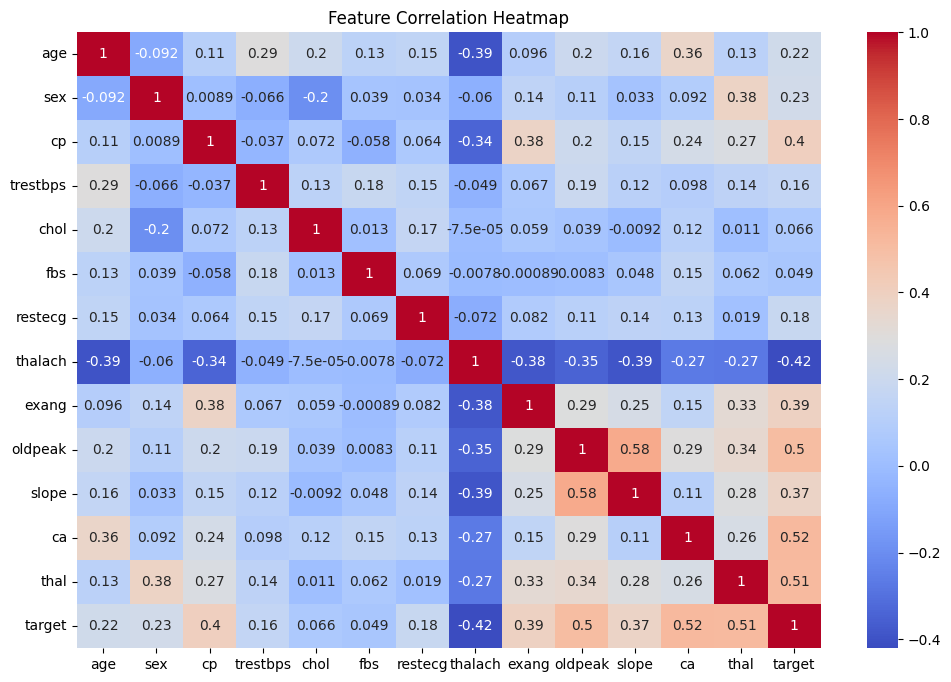

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


 2. Count Plot for Target

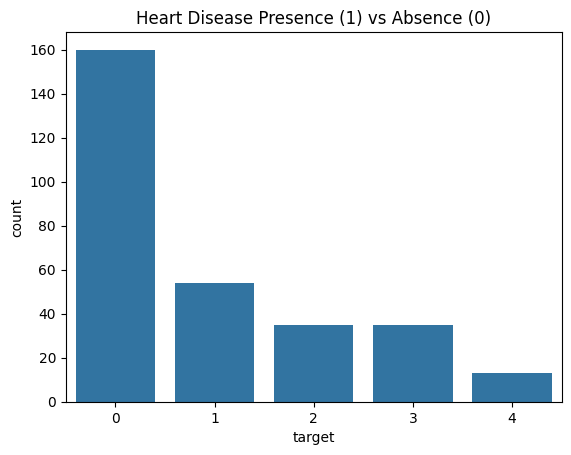

In [36]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()


 3. Distribution of Age

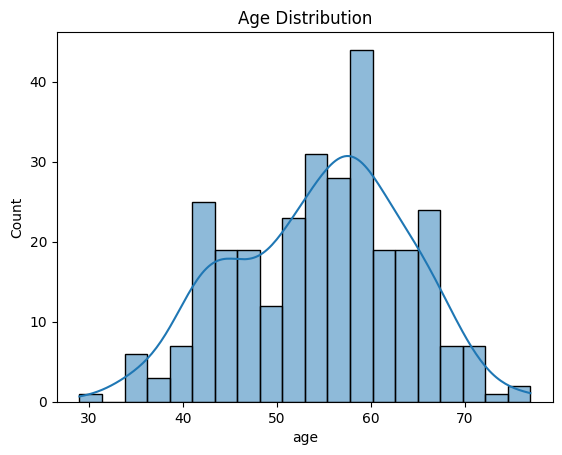

In [37]:
sns.histplot(df["age"], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()


#Class vs Features

Compare Cholesterol by Target

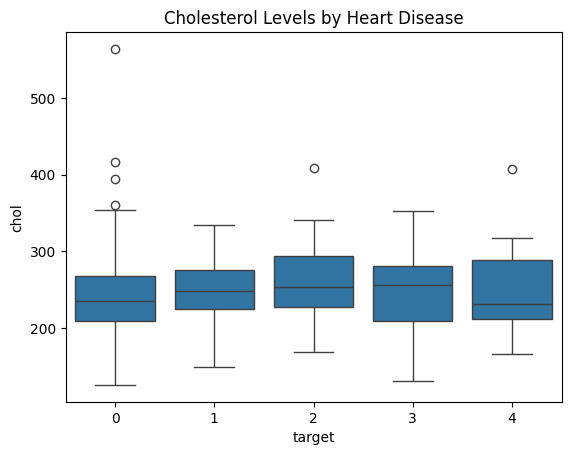

In [38]:
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol Levels by Heart Disease")
plt.show()


Compare Maximum Heart Rate

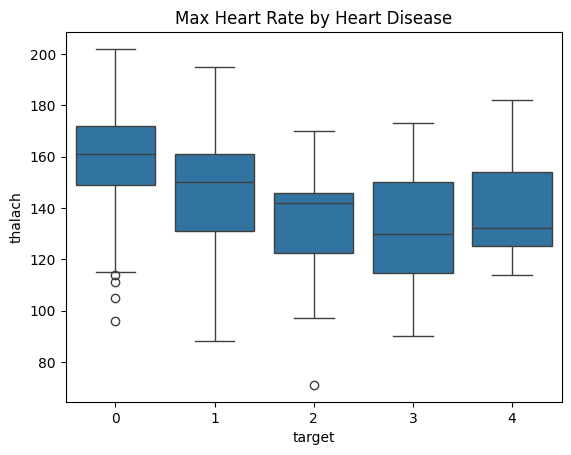

In [39]:
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Max Heart Rate by Heart Disease")
plt.show()
